In [18]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [13]:
# задать параметры системы
eps = 1.0
a = 1.0

# задать параметры разбиения для построяние графиков
tau = 0.5  # шаг по времени
h = 0.5  # шаг по пространству
T = 100.0  # максимальное время
L = 10.0  # параметр для длины

In [14]:
# задание функции решения

def u_func(x, t):
    """Функция находит решение системы для конкретной точки (x, t)"""

    def phi(x):
        return 1 - (1 if x >= 0 else 0)

    if t == 0.0:
        return phi(x)
    if eps == 0:
        return phi(x - a * t)

    def integrand(y, x, t, eps, a):
        return phi(y) * np.exp(-(x - y - a * t) ** 2 / (4 * eps * t))

    factor = 1 / np.sqrt(4 * np.pi * eps * t)
    integral, error = quad(integrand, -np.inf, np.inf, args=(x, t, eps, a))
    return factor * integral

In [15]:
# вычисление решения

x_lst = np.arange(-L, 10 * L, h)
t_lst = np.arange(1.0, T, tau)
u = np.empty((len(t_lst), len(x_lst)))
for n, t in enumerate(t_lst):
    for i, x in enumerate(x_lst):
        u[n, i] = u_func(x, t)

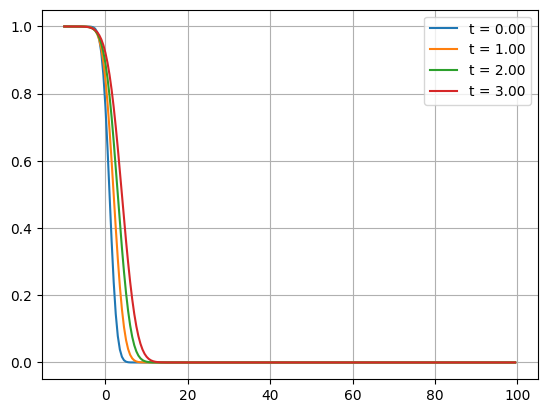

In [16]:
# построение графика для первых нескольких шагов

step_count = 100
times_to_plot = np.arange(0, T, T / step_count)
for t in times_to_plot[:4]:
    n = int(t / tau)
    plt.plot(x_lst, u[n, :], label=f't = {t:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# cоздание гифки
image_folder = 'for_gif'
gif_path = 'animation.gif'

In [33]:
def create_images_for_gif(image_folder: str):
    # создать графики в папке for_gif
    for t in t_lst:
        n = int(t / tau)
        if n >= u.shape[0]:
            break
        plt.plot(x_lst, u[n, :])
        file_name = f'{t:012.6f}'
        plt.title(f't = {t:.6f}')
        plt.xlabel('x')
        plt.ylabel('u(x)')
        plt.grid(True)
        plt.ylim(-0.1, 1.1)
        plt.savefig(f'{image_folder}/{file_name}.png')
        plt.close()

In [34]:
from convection_diffusion_equation.gif import create_gif

create_gif(image_folder, gif_path, create_images_for_gif)